# 회귀모형 예측성능 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'cbook' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\jaeyeon\anaconda3\Lib\site-packages\matplotlib\__init__.py)

In [2]:
df=pd.read_csv('copdcat.csv' ,header=0)
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]
df

,age,sex,FEV1%,Smoke_pack_year,Chol,Comorbid,premium,CATScore
0,53,1,74.13,9.2,170.83,1,59649,7.8
1,48,1,53.24,0.0,168.82,0,47348,9.1
2,55,1,70.39,16.3,193.98,0,49599,7.6
3,62,0,69.87,44.8,215.33,1,58428,14.5
4,48,1,76.41,32.8,184.65,1,50806,11.1
...,...,...,...,...,...,...,...,...
5246,45,1,53.32,0.0,241.90,1,45933,7.1
5247,37,0,57.03,44.4,182.58,0,38004,16.8
5248,56,0,50.61,18.6,198.92,0,66896,7.3
5249,53,1,63.59,45.3,206.71,1,67557,12.2


## 데이터 구분 : 학습 데이터와 검증데이터

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

### 선형 회귀분석

In [5]:
from sklearn.linear_model import LinearRegression
r_linear = LinearRegression(fit_intercept = True)
r_linear.fit(X_train ,y_train)
linear_pred= r_linear.predict(X_test)

### Test 데이터 실제 y값과 예측 y값

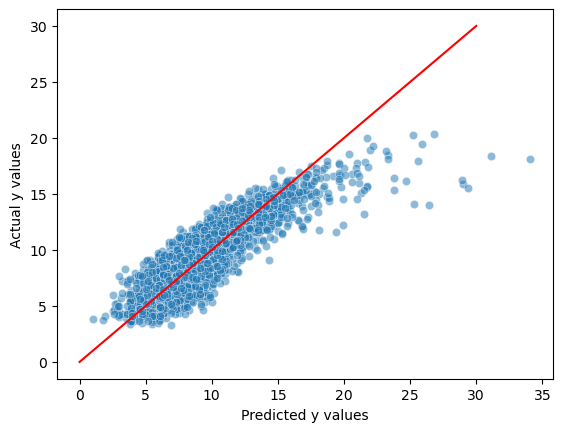

In [6]:
sns.scatterplot(y=linear_pred, x=y_test, alpha=0.5)
plt.plot([0, 30], [0, 30], color='red')
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

### Alpha=0.0, min_impurity_decrease=0.007,  min_samples_split=2  트리

In [7]:
from sklearn.tree import DecisionTreeRegressor
r_tree = DecisionTreeRegressor(ccp_alpha=0.0,min_impurity_decrease=0.007,min_samples_split=2,random_state=0)
r_tree.fit(X_train, y_train)
tree_pred= r_tree.predict(X_test)

### Test 데이터 실제 y값과 예측 y값

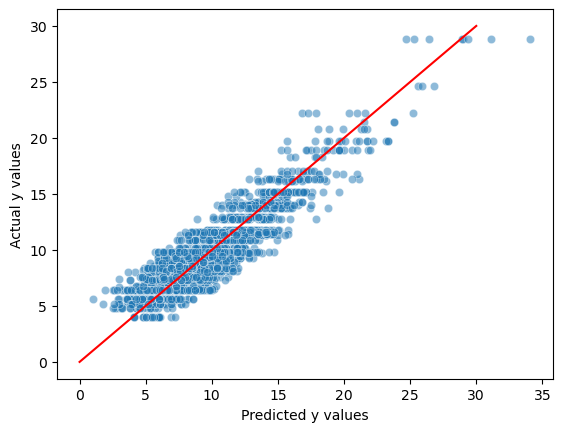

In [8]:
sns.scatterplot(y=tree_pred, x=y_test, alpha=0.5)
plt.plot([0, 30], [0, 30], color='red')
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

## 예측 $R^2$

In [9]:
from sklearn.metrics import r2_score
print('linear regression :',np.round(r2_score(y_test, linear_pred),3))
print('regression tree :',np.round(r2_score(y_test, tree_pred),3))

linear regression : 0.74
regression tree : 0.817


## MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
print('linear regression :',np.round(mean_absolute_error(y_test, linear_pred),3))
print('regression tree :',np.round(mean_absolute_error(y_test, tree_pred),3))

## MAPE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('linear regression :',np.round(mean_absolute_percentage_error(y_test, linear_pred),3))
print('regression tree :',np.round(mean_absolute_percentage_error(y_test, tree_pred),3))

## MSE

In [ ]:
from sklearn.metrics import mean_squared_error
print('linear regression :',np.round(mean_squared_error(y_test, linear_pred),3))
print('regression tree :',np.round(mean_squared_error(y_test, tree_pred),3))

# 모든 회귀모형 예측력 비교

### 신경망분석

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
r_nn = MLPRegressor(hidden_layer_sizes=(5), random_state=0, max_iter = 1000)
r_nn.fit(X_train_scaled, y_train)

### SVR

In [ ]:
from sklearn.svm import SVR, SVC
r_svr = SVR(kernel='rbf') 
r_svr.fit(X_train_scaled, y_train)

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r_rf = RandomForestRegressor(random_state=0)
r_rf.fit(X_train,y_train)

## 예측 $R^2$

In [ ]:
from sklearn.metrics import r2_score as r2
print('Linear Regression:',np.round(r2(y_test,r_linear.predict(X_test)),2))
print('Pruned Tree      :',np.round(r2(y_test,r_tree.predict(X_test)),2))
print('Neural Nerwork   :',np.round(r2(y_test,r_nn.predict(X_test_scaled)),2))
print('SV Regression    :',np.round(r2(y_test,r_svr.predict(X_test_scaled)),2))
print('Random Forest    :',np.round(r2(y_test,r_rf.predict(X_test)),2))

## MAE

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('Linear Regression:',np.round(mae(y_test,r_linear.predict(X_test)),2))
print('Pruned Tree      :',np.round(mae(y_test,r_tree.predict(X_test)),2))
print('Neural Nerwork   :',np.round(mae(y_test,r_nn.predict(X_test_scaled)),2))
print('SV Regression    :',np.round(mae(y_test,r_svr.predict(X_test_scaled)),2))
print('Random Forest    :',np.round(mae(y_test,r_rf.predict(X_test)),2))

## MAPE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
print('Linear Regression:',np.round(mape(y_test,r_linear.predict(X_test)),2))
print('Pruned Tree      :',np.round(mape(y_test,r_tree.predict(X_test)),2))
print('Neural Nerwork   :',np.round(mape(y_test,r_nn.predict(X_test_scaled)),2))
print('SV Regression    :',np.round(mape(y_test,r_svr.predict(X_test_scaled)),2))
print('Random Forest    :',np.round(mape(y_test,r_rf.predict(X_test)),2))

## MSE

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print('Linear Regression:',np.round(mse(y_test,r_linear.predict(X_test)),2))
print('Pruned Tree      :',np.round(mse(y_test,r_tree.predict(X_test)),2))
print('Neural Nerwork   :',np.round(mse(y_test,r_nn.predict(X_test_scaled)),2))
print('SV Regression    :',np.round(mse(y_test,r_svr.predict(X_test_scaled)),2))
print('Random Forest    :',np.round(mse(y_test,r_rf.predict(X_test)),2))